# COGD Historical Data
## Setting Donor Goals for 2018

## Overview
2018 CO Gives Day is fast approaching and to kick things off we need to set some proper goals. What better way to determine how many donors can get on COGD than by doing a little bit of math.   

## The Analysis 
Below you’ll see how many donors we had each year we ran COGD (Table 1). As you can see, we have some pretty consistent growth from the beginning (awesome!). It’s interesting to note that there was a significant dip in participation in 2017 (because of the non election year status?). Yet, 2017 was a standout fundraising year: COGD raised over $20,000 over the course of the entire year!

As always, we'll read in the necessary libraries

In [185]:
import pandas as pd
import numpy as np
from pandas.compat import StringIO
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from scipy import stats

### Setting Up the Data
We'll read in the data and take a peak at the dataframe. We see that every row is a unique transaction with the donor names, transaction data, and amount. 

We'll need to manipulate the data to summarise 

In [133]:
data = pd.read_csv("COGD giving history 2013-2017 - Sheet.csv")

In [134]:
data.head()

,Count,Contribution ID,Received On,Amount,Designation,Contribution Type,Cycle,Period,Note,Source Code Path,Contact ID,Contact Name
0,NaN,VNW16E5Z4C7,12/7/2011,$15.00,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,COGD,VNX0EGHDAM0,Erika Blum
1,NaN,VNW16E5Z4G9,12/4/2012,$250.00,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,COGD,VNX0EGHKG27,Robert Shurr
2,NaN,VNW16DYYH24,12/8/2013,$100.00,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,c3 Donors/COGD 2013,VNX0EJSCF16,Thomas Pritchard
3,NaN,VNW16DYYER9,12/9/2013,$100.00,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,c3 Donors/COGD 2013,VNX0EGGX920,Diane Rosenthal
4,NaN,VNW16DYYH89,12/9/2013,$200.00,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,c3 Donors/COGD 2013,VNX0EKDVCZ7,William Briggs


In [135]:
# Conver the Received On column to datetime so we can perform operations on these data!
data['Received On'] = pd.to_datetime(data['Received On'])

In [136]:
#We only care about the year of the gift, so we'll simplify the Received On column to the year
data['Received On'] = data['Received On'].dt.year
data.head()

,Count,Contribution ID,Received On,Amount,Designation,Contribution Type,Cycle,Period,Note,Source Code Path,Contact ID,Contact Name
0,NaN,VNW16E5Z4C7,2011.0,$15.00,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,COGD,VNX0EGHDAM0,Erika Blum
1,NaN,VNW16E5Z4G9,2012.0,$250.00,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,COGD,VNX0EGHKG27,Robert Shurr
2,NaN,VNW16DYYH24,2013.0,$100.00,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,c3 Donors/COGD 2013,VNX0EJSCF16,Thomas Pritchard
3,NaN,VNW16DYYER9,2013.0,$100.00,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,c3 Donors/COGD 2013,VNX0EGGX920,Diane Rosenthal
4,NaN,VNW16DYYH89,2013.0,$200.00,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,c3 Donors/COGD 2013,VNX0EKDVCZ7,William Briggs


In [137]:
data = data.drop(data.index[927])

## Number of Unique Donors per Year

In [166]:
num_donors = data.groupby('Received On')['Contact Name'].nunique().to_frame().reset_index()
num_donors.columns = ['Received On', 'Number of Donors']
num_donors = num_donors.drop(num_donors.index[7])
num_donors


,Received On,Number of Donors
0,2011.0,1
1,2012.0,1
2,2013.0,116
3,2014.0,198
4,2015.0,195
5,2016.0,224
6,2017.0,126


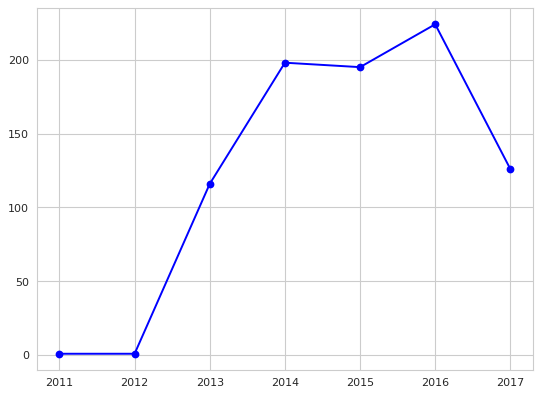

In [182]:
A = num_donors["Received On"]
B = num_donors["Number of Donors"]
fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

ax = fig.add_subplot(111)
plt.plot(num_donors["Received On"], num_donors["Number of Donors"], marker='o', color='b')

## Predicting the Number of Donors for 2018
A LOT goes into predicting participating in any fundraising campaign -- there’s just so many variables that influence giving year to year, season to season. For the purposes of this analysis, I just wanted to get a feel for the general growth of the program over time, so I plotted a linear regression line on top of the data, shown below (Figure 1).


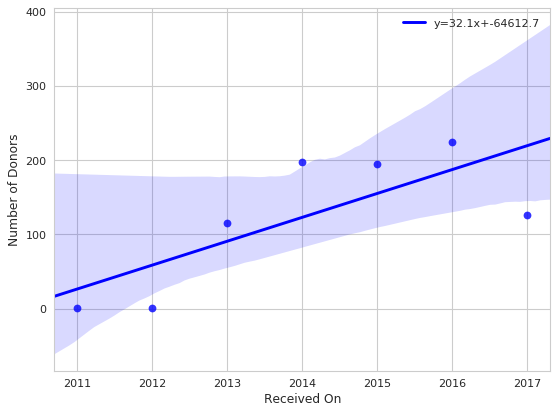

In [190]:
fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

slope, intercept, r_value, p_value, std_err = stats.linregress(num_donors['Received On'],num_donors['Number of Donors'])
ax = sns.regplot(x="Received On", y="Number of Donors", data=num_donors, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

ax.legend()

In [199]:
# Predicting the number of new donors
year = 2018
(32.14285714285714 * year) -64612.714285714275

251.57142857142753

We can expect to reach **250 donors** this year if we continue growing at the same rate.

But will we?

## Hold Up...Wait a Minute.
250 is a LOT of donors compared to last year ‘s reach (126 donors). Is this really feasible? 
We had a pretty big dip in donors last year in 2017 that but a bit stop to our pretty awesome linear growth. What could impact the number of donors we reach this year?

Here are my questions:

**Staff Turnover** Have we lost a lot of staff that had ties to previous COGD donors? 

**How many have already given** How many donors from our go to lists have already given this year? Are we still waiting on any gifts from donors?

**How big our the staff lists?** Can we reliably expect to bring in new donors from our staff? If so, how many historically?   



## Money Raised per Year  

It's all about the dollar, dollar bills, y'all!

We have to do a bit of data cleaning to take the Amount column in the dataframe and make the values numeric (and take care of all those pesky dollar signs!)  

Once we do that, it's pretty easy to group the data by year and amount to find the annual amount raised!

In [139]:
data['Amount'] = data[data.columns[3]].replace('[\$,]', '', regex=True).astype(float)
data.head()

,Count,Contribution ID,Received On,Amount,Designation,Contribution Type,Cycle,Period,Note,Source Code Path,Contact ID,Contact Name
0,NaN,VNW16E5Z4C7,2011.0,15.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,COGD,VNX0EGHDAM0,Erika Blum
1,NaN,VNW16E5Z4G9,2012.0,250.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,COGD,VNX0EGHKG27,Robert Shurr
2,NaN,VNW16DYYH24,2013.0,100.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,c3 Donors/COGD 2013,VNX0EJSCF16,Thomas Pritchard
3,NaN,VNW16DYYER9,2013.0,100.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,c3 Donors/COGD 2013,VNX0EGGX920,Diane Rosenthal
4,NaN,VNW16DYYH89,2013.0,200.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,c3 Donors/COGD 2013,VNX0EKDVCZ7,William Briggs


In [144]:
data.tail()


,Count,Contribution ID,Received On,Amount,Designation,Contribution Type,Cycle,Period,Note,Source Code Path,Contact ID,Contact Name
922,NaN,VNW16G3N6C3,2018.0,25.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,COGD,VNX0ETVWTW5,Carla Slatt-Burns
923,NaN,VNW16G9E7A6,2018.0,10.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,COGD,VNX0EGHKG27,Robert Shurr
924,NaN,VNW16G9E798,2018.0,20.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,COGD,VNX0EGH2WM1,Susan Peterson
925,NaN,VNW16G9CNK9,2018.0,25.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,COGD,VNX0ETVWTW5,Carla Slatt-Burns
926,NaN,VNW16G9E7B4,2018.0,10.0,New Era Colorado Foundation,Monetary Contribution,NaN,NaN,NaN,COGD,VNX0EGHKG27,Robert Shurr


In [216]:
byyear = data.groupby('Received On')['Amount'].agg('sum')
byyear = byyear.to_frame().reset_index()
byyear = byyear.drop(byyear.index[0])
byyear = byyear.drop(byyear.index[6])
byyear

,Received On,Amount
1,2012.0,250.00
2,2013.0,9625.43
3,2014.0,15938.49
4,2015.0,14538.00
5,2016.0,13272.00
6,2017.0,20149.11


Text(0.5,1,'Growth of Colorado Gives Day Since 2013')

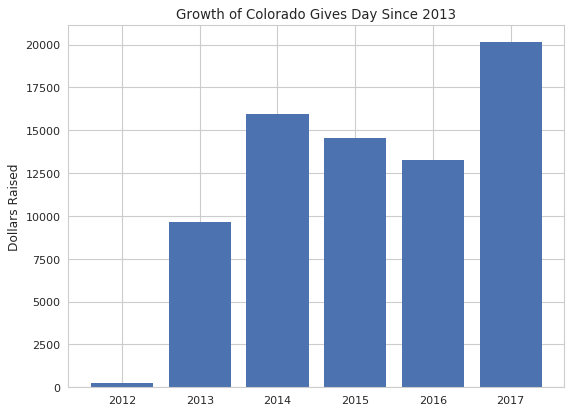

In [217]:
%matplotlib inline
x = byyear['Amount']
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.bar(byyear['Received On'], byyear['Amount'], align='center')
plt.ylabel('Dollars Raised')
plt.title('Growth of Colorado Gives Day Since 2013')

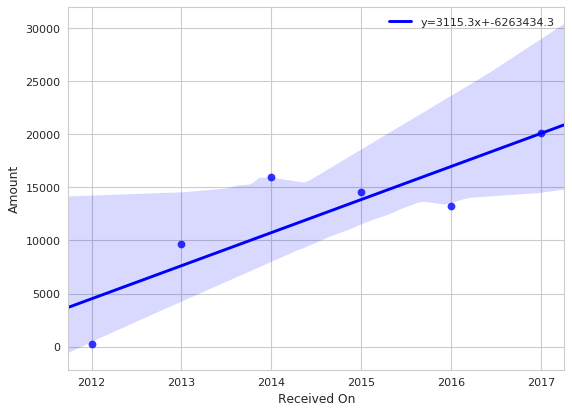

In [218]:
fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

slope, intercept, r_value, p_value, std_err = stats.linregress(byyear['Received On'],byyear['Amount'])
ax = sns.regplot(x="Received On", y="Amount", data=byyear, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

ax.legend()

In [220]:
## print out a more precise intercept for the calculation below
slope

3115.2791428571422

In [221]:
## Predicting our revenue for 2018!
year = 2018
3115.2791428571422 * year -6263434.328285713

23198.981999999844

It looks like over the course of all of 2018, we can expect to raise $23,198 from COGD!

## Conclusion 
Given the spread of the data in the last two years, and a lack of knowledge about NEC’s donor lists, I suggest  compromise of 200 donors for COGD 2018. 
